# 1. Install & Import All Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Evaluation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Deep Learning (LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Explainability
import shap


# 2. Uploading the Dataset

In [4]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# 3. Basic Info + Missing Values

In [5]:
df.shape

(350, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [8]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


# 4. Clean Data

In [9]:
# Imputing null values with mode value because it is categorical column
df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)

#checking if any duplicate values
print("Number of duplicate values :",df.duplicated().sum())

# Confirm shape after cleaning
print("Dataset shape after cleaning:", df.shape)


Number of duplicate values : 0
Dataset shape after cleaning: (350, 11)


/tmp/ipython-input-3572521880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)


In [10]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


#5. Exploratory Data Analysis (EDA)

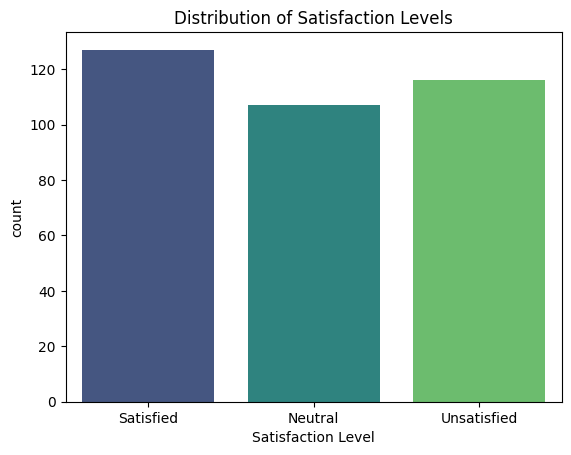

In [11]:
# Satisfaction distribution
sns.countplot(x='Satisfaction Level', data=df,hue = 'Satisfaction Level', palette='viridis')
plt.title("Distribution of Satisfaction Levels")
plt.show()


Interpretation:The chart above shows that most customers are satisfied, followed closely by those who are unsatisfied, while neutral responses are slightly fewer.
This indicates that although satisfaction is highest, some portion of customers are still unhappy, suggesting areas for improvement.

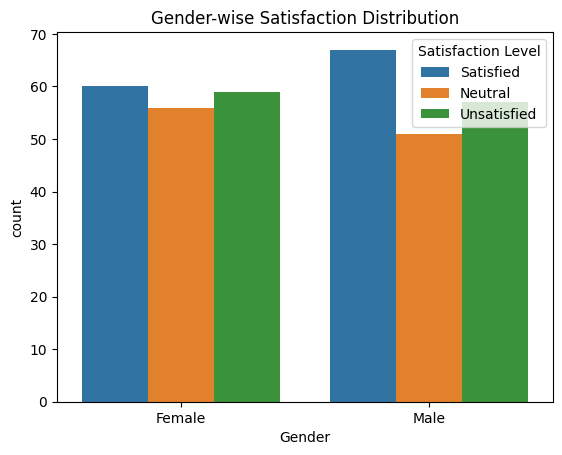

In [12]:
# Gender vs Satisfaction
sns.countplot(x='Gender', hue='Satisfaction Level', data=df)
plt.title("Gender-wise Satisfaction Distribution")
plt.show()

Interpretation:The plot shows that males have slightly higher satisfaction levels compared to females, while unsatisfied counts are similar across genders.
Neutral responses are a bit higher for females. Overall, satisfaction patterns are fairly balanced between genders with minor variations.

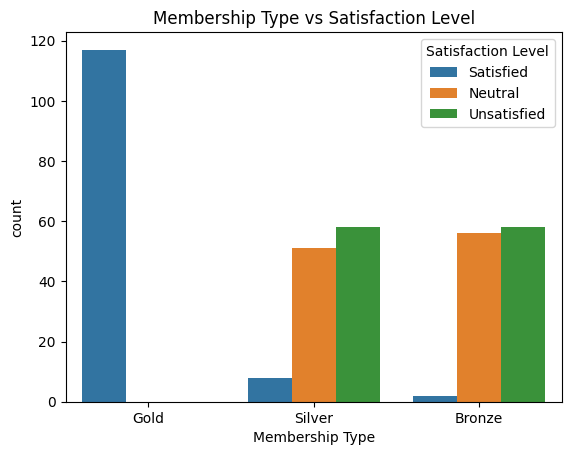

In [13]:
# Membership vs Satisfaction
sns.countplot(x='Membership Type', hue='Satisfaction Level', data=df)
plt.title("Membership Type vs Satisfaction Level")
plt.show()

Interpretation: From the above plot we can see that Gold members have very high satisfaction, with almost no neutral or unsatisfied responses.
In contrast, Silver and Bronze members show more neutral and unsatisfied customers, with very few being satisfied.
This indicates that higher-tier memberships (Gold) provide a significantly better customer experience, while lower-tier members may need service improvements

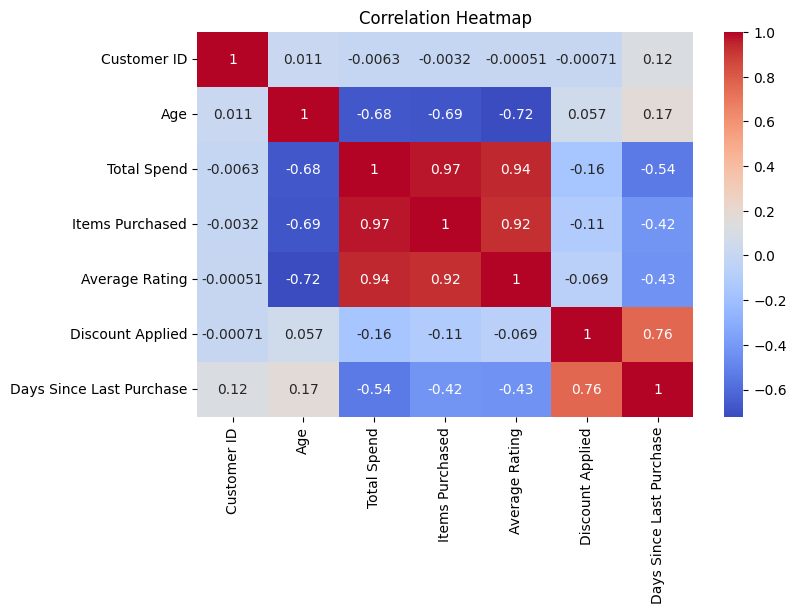

In [14]:
# Correlation of numeric features
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Interpretation: From the above heatmap we can see that The heatmap shows very strong positive correlations between Total Spend, Items Purchased, and Average Rating, meaning customers who buy more items usually spend more and give higher ratings. There is also a strong positive correlation between Discount Applied and Days Since Last Purchase, suggesting customers who haven't purchased in a while receive more discounts.Age has a moderate negative correlation with spending and purchasing, indicating younger customers tend to buy more than older ones.

#6. Encoding Categorical Columns

In [15]:
# Label Encoding for categorical features
label_encoders = {}

categorical_cols = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Boolean to int
df['Discount Applied'] = df['Discount Applied'].astype(int)

print("\nEncoded Data Sample:")
df.head()



Encoded Data Sample:


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,1,25,1
1,102,1,34,2,2,780.50,11,4.1,0,18,0
2,103,0,43,0,0,510.75,9,3.4,1,42,2
3,104,1,30,5,1,1480.30,19,4.7,0,12,1
4,105,1,27,3,2,720.40,13,4.0,1,55,2


In [16]:
df['City'].unique()

array([4, 2, 0, 5, 3, 1])

In [17]:
df['Membership Type'].unique()

array([1, 2, 0])

In [18]:
df['Satisfaction Level'].unique()

array([1, 0, 2])

#7. Feature Selection

In [19]:
X = df.drop(['Customer ID', 'Satisfaction Level'], axis=1)
y = df['Satisfaction Level']  # Multiclass target (0,1,2)

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)



Feature Shape: (350, 9)
Target Shape: (350,)


#8. Normalize Features

In [20]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Check scaled sample
print("\nScaled Feature Example:\n")
X_scaled[:5]



Scaled Feature Example:



array([[0.        , 0.17647059, 0.8       , 0.5       , 0.63950239,
        0.5       , 0.84210526, 1.        , 0.2962963 ],
       [1.        , 0.47058824, 0.4       , 1.        , 0.33327324,
        0.28571429, 0.57894737, 0.        , 0.16666667],
       [0.        , 1.        , 0.        , 0.        , 0.09010187,
        0.14285714, 0.21052632, 1.        , 0.61111111],
       [1.        , 0.23529412, 1.        , 0.5       , 0.96412152,
        0.85714286, 0.89473684, 0.        , 0.05555556],
       [1.        , 0.05882353, 0.6       , 1.        , 0.27909492,
        0.42857143, 0.52631579, 1.        , 0.85185185]])

#9. Train–Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Reshape for LSTM input [samples, timesteps, features]
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("X_train shape:", X_train_rnn.shape)
print("X_test shape:", X_test_rnn.shape)
print(df['Satisfaction Level'].value_counts())

X_train shape: (280, 1, 9)
X_test shape: (70, 1, 9)
Satisfaction Level
1    127
2    116
0    107
Name: count, dtype: int64


#10. Build LSTM Model

In [22]:
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Satisfied, Neutral, Unsatisfied
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
lstm_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,939 (124.76 KB)

 Trainable params: 31,939 (124.76 KB)

 Non-trainable params: 0 (0.00 B)

#11. Train LSTM Model

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_lstm = lstm_model.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.4335 - loss: 1.0972 - val_accuracy: 0.6607 - val_loss: 1.0933
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6189 - loss: 1.0921 - val_accuracy: 0.6607 - val_loss: 1.0861
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6567 - loss: 1.0844 - val_accuracy: 0.6786 - val_loss: 1.0767
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6122 - loss: 1.0793 - val_accuracy: 0.6786 - val_loss: 1.0648
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6531 - loss: 1.0618 - val_accuracy: 0.6786 - val_loss: 1.0467
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6882 - loss: 1.0458 - val_accuracy: 0.6786 - val_loss: 1.0197
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6044 - loss: 1.0259 - val_accuracy: 0.6786 - val_loss: 0.9810
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6587 - loss: 0.9803 - val_accuracy: 0.6786 - val_loss: 0.9244


# 12.Build GRU Model

In [26]:
gru_model = Sequential([
        GRU(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(3, activation='softmax')
    ])

In [27]:
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 64)          │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,387 (95.26 KB)

 Trainable params: 24,387 (95.26 KB)

 Non-trainable params: 0 (0.00 B)

# 13. Train Gru model

In [30]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history_gru = gru_model.fit(
    X_train_rnn, y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    callbacks=[reduce_lr],
    verbose=2
)

Epoch 1/50
8/8 - 5s - 564ms/step - accuracy: 0.4580 - loss: 1.0970 - val_accuracy: 0.4048 - val_loss: 1.0791 - learning_rate: 1.0000e-03
Epoch 2/50
8/8 - 0s - 16ms/step - accuracy: 0.6050 - loss: 1.0614 - val_accuracy: 0.7857 - val_loss: 1.0378 - learning_rate: 1.0000e-03
Epoch 3/50
8/8 - 0s - 14ms/step - accuracy: 0.6008 - loss: 1.0320 - val_accuracy: 0.8095 - val_loss: 0.9905 - learning_rate: 1.0000e-03
Epoch 4/50
8/8 - 0s - 20ms/step - accuracy: 0.6849 - loss: 0.9882 - val_accuracy: 0.8571 - val_loss: 0.9292 - learning_rate: 1.0000e-03
Epoch 5/50
8/8 - 0s - 38ms/step - accuracy: 0.7311 - loss: 0.9288 - val_accuracy: 0.8571 - val_loss: 0.8473 - learning_rate: 1.0000e-03
Epoch 6/50
8/8 - 0s - 25ms/step - accuracy: 0.8109 - loss: 0.8608 - val_accuracy: 1.0000 - val_loss: 0.7563 - learning_rate: 1.0000e-03
Epoch 7/50
8/8 - 0s - 25ms/step - accuracy: 0.9034 - loss: 0.7765 - val_accuracy: 0.9762 - val_loss: 0.6495 - learning_rate: 1.0000e-03
Epoch 8/50
8/8 - 0s - 22ms/step - accuracy: 0.9

#14. Model Evaluation

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step

=== LSTM ===
Accuracy: 0.9857142857142858
Classification report:
               precision    recall  f1-score   support

           0     0.9565    1.0000    0.9778        22
           1     1.0000    0.9600    0.9796        25
           2     1.0000    1.0000    1.0000        23

    accuracy                         0.9857        70
   macro avg     0.9855    0.9867    0.9858        70
weighted avg     0.9863    0.9857    0.9857        70



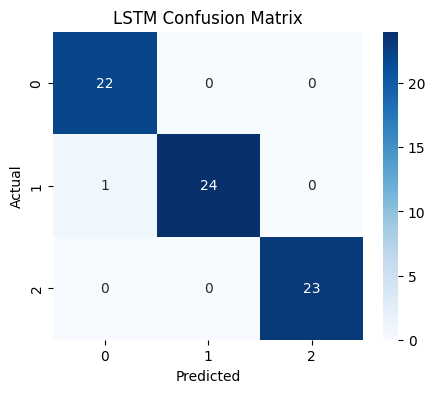

Multiclass ROC AUC (ovr): 0.9893101851851851
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step

=== GRU ===
Accuracy: 0.9857142857142858
Classification report:
               precision    recall  f1-score   support

           0     0.9565    1.0000    0.9778        22
           1     1.0000    0.9600    0.9796        25
           2     1.0000    1.0000    1.0000        23

    accuracy                         0.9857        70
   macro avg     0.9855    0.9867    0.9858        70
weighted avg     0.9863    0.9857    0.9857        70



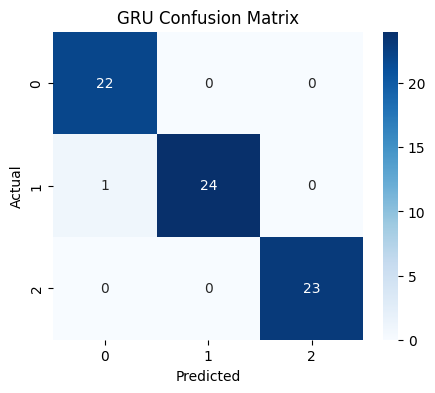

Multiclass ROC AUC (ovr): 0.9865467171717172


In [31]:
def eval_model(model, X_test_rnn, y_test, model_name='model'):
    preds_prob = model.predict(X_test_rnn)
    preds = np.argmax(preds_prob, axis=1)
    acc = accuracy_score(y_test, preds)
    print(f"\n=== {model_name} ===")
    print("Accuracy:", acc)
    print("Classification report:\n", classification_report(y_test, preds, digits=4))
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()
    # multiclass AUC (one-vs-rest)
    try:
        auc = roc_auc_score(y_test, preds_prob, multi_class='ovr')
        print("Multiclass ROC AUC (ovr):", auc)
    except Exception as e:
        print("Could not compute ROC AUC:", e)
    return {'acc': acc, 'cm': cm, 'preds': preds, 'probs': preds_prob}

res_lstm = eval_model(lstm_model, X_test_rnn, y_test, model_name='LSTM')
res_gru  = eval_model(gru_model,  X_test_rnn, y_test, model_name='GRU')

Interpretation: Both LSTM and GRU models show nearly identical performance, achieving 98.6% accuracy and excellent precision, recall, and F1-scores across all classes in the classification report. Their ROC AUC scores are also extremely close, with LSTM slightly ahead (0.9893 vs. 0.9865). Since they're both highly effective, we can confidently use either model. As we want slightly more stability and explainability, LSTM is a strong choice, but using GRU will also give equally accurate results for this dataset.

In [32]:
ylstm_pred = np.argmax(lstm_model.predict(X_test_rnn), axis=1)
ygru_pred = np.argmax(gru_model.predict(X_test_rnn), axis=1)

print(" Test Accuracy for lstm model:", accuracy_score(y_test, ylstm_pred))
print(" Test Accuracy for gru model:", accuracy_score(y_test, ygru_pred))
print("\nClassification Report of lstm model:\n", classification_report(y_test, ylstm_pred))
print("\nClassification Report of gru model:\n", classification_report(y_test, ygru_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
 Test Accuracy for lstm model: 0.9857142857142858
 Test Accuracy for gru model: 0.9857142857142858

Classification Report of lstm model:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        23

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70


Classification Report of gru model:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.96      0.98        25
           2       1.00      1.00      1.00        23

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.

In [33]:
print("\nComparison (Test Accuracy): LSTM = {:.4f}, GRU = {:.4f}".format(res_lstm['acc'], res_gru['acc']))
if res_lstm['acc'] > res_gru['acc']:
    print("LSTM performs better on test accuracy.")
elif res_lstm['acc'] < res_gru['acc']:
    print("GRU performs better on test accuracy.")
else:
    print("Both equal on test accuracy. Check other metrics (AUC, recall per class).")


Comparison (Test Accuracy): LSTM = 0.9857, GRU = 0.9857
Both equal on test accuracy. Check other metrics (AUC, recall per class).


# 15. Accuracy & Loss Graphs

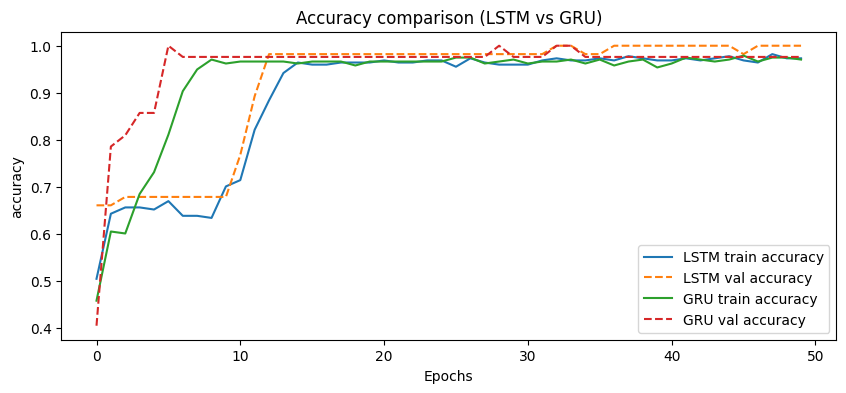

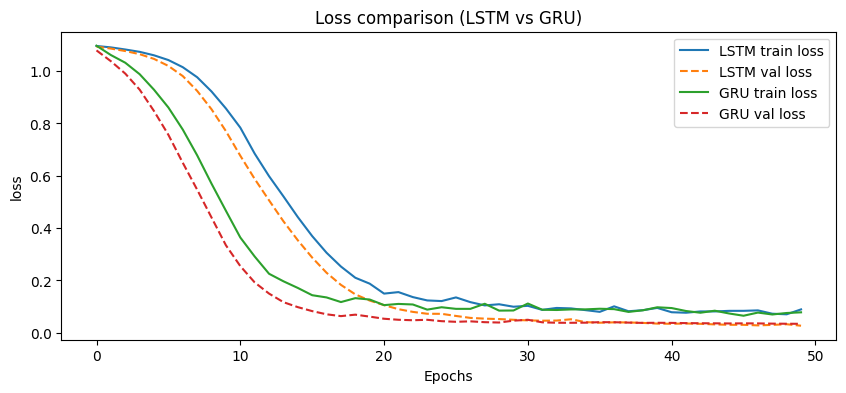

In [34]:
def plot_histories(h1, h2, metric='accuracy', title='Model comparison'):
    plt.figure(figsize=(10,4))
    plt.plot(h1.history[metric], label='LSTM train '+metric)
    plt.plot(h1.history.get('val_'+metric, []), label='LSTM val '+metric, linestyle='--')
    plt.plot(h2.history[metric], label='GRU train '+metric)
    plt.plot(h2.history.get('val_'+metric, []), label='GRU val '+metric, linestyle='--')
    plt.xlabel('Epochs'); plt.ylabel(metric); plt.title(title)
    plt.legend(); plt.show()

plot_histories(history_lstm, history_gru, metric='accuracy', title='Accuracy comparison (LSTM vs GRU)')
plot_histories(history_lstm, history_gru, metric='loss', title='Loss comparison (LSTM vs GRU)')

Interpretation:As both accuracy are same.We have compared with loss and accuracy graphs. Both LSTM and GRU models quickly reach high accuracy above 95%, but LSTM performs slightly better and more consistently throughout the training and validation phases, as shown in the first graph. The loss curves in the second graph show that both models reduce error fast, but the LSTM model maintains a lower and more stable loss overall compared to GRU, especially for validation loss. This means the LSTM model is both accurate and reliable for this dataset, while GRU also performs well but is slightly less stable. Both algorithms are strong choices, but LSTM offers a small edge in this scenario.​

# 16. Training a RandomForest on the same preprocessed tabular features and using TreeExplainer.


Training a RandomForest for fast interpretability via SHAP (recommended).
RF accuracy (for interpretability): 0.9857142857142858


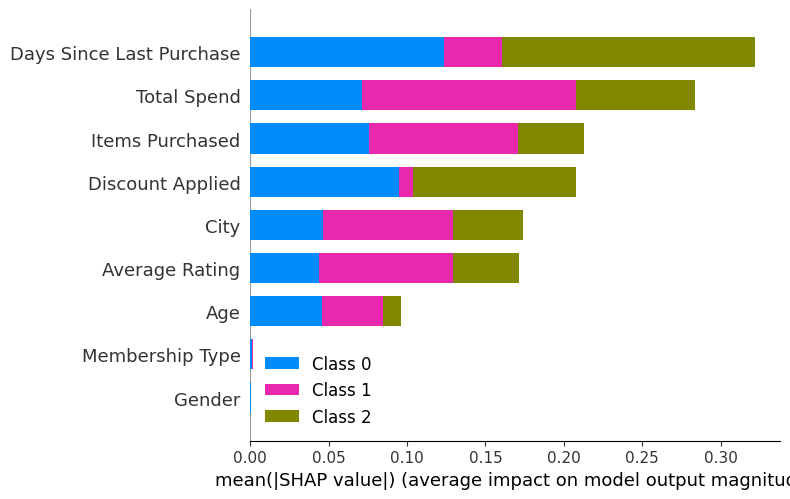

Insight: The bar summary shows global feature importance according to RandomForest.This is used to understand which features are most affect predicted satisfaction classes.


In [35]:
print("\nTraining a RandomForest for fast interpretability via SHAP (recommended).")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("RF accuracy (for interpretability):", accuracy_score(y_test, rf_preds))

# TreeExplainer: fast and accurate
explainer_rf = shap.TreeExplainer(rf)
# Use a small sample of test for plotting
sample_idx = np.random.choice(X_test.shape[0], min(200, X_test.shape[0]), replace=False)
shap_vals_rf = explainer_rf.shap_values(X_test[sample_idx])

# summary plot (global importance)
shap.summary_plot(shap_vals_rf, X_test[sample_idx], feature_names=X.columns.tolist(), plot_type="bar", show=True)
print("Insight: The bar summary shows global feature importance according to RandomForest.This is used to understand which features are most affect predicted satisfaction classes.")


Interpretation: The bar chart shows that "Days Since Last Purchase," "Total Spend," and "Items Purchased" are the most influential factors in predicting customer satisfaction. Other features like "Discount Applied" and "City" play a smaller but still noticeable role, while "Membership Type" and "Gender" have very little impact overall. This means that how often customers buy, how much they spend, and how many items they purchase matter most for satisfaction predictions. Focusing on these areas can help improve targeted marketing or customer support

#17. SHAP Feature Importance (KernelExplainer)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
313/313 ━━━━

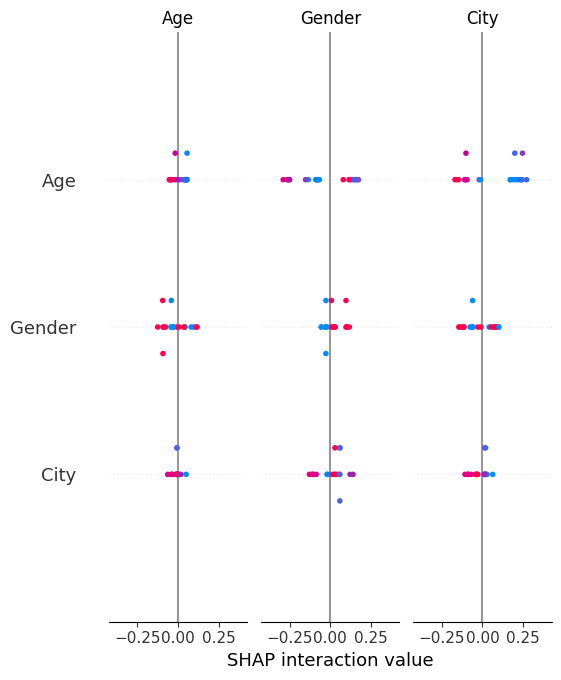

Insight: Kernel SHAP explains local contributions to NN predictions .


In [36]:
import shap
import numpy as np

X_train_2D = X_train  # already 2D scaled features
background = X_train_2D[np.random.choice(X_train_2D.shape[0], min(50, X_train_2D.shape[0]), replace=False)]
test_slice = X_test[np.random.choice(X_test.shape[0], min(20, X_test.shape[0]), replace=False)]

# prediction wrapper expecting 2D features
def predict_nn_2d(x):  # x is 2D array [n, features]
    x3 = x.reshape((x.shape[0], 1, x.shape[1]))
    prob = lstm_model.predict(x3)
    return prob  # returns n x classes

# KernelExplainer (limit usage)
ke = shap.KernelExplainer(predict_nn_2d, background)
shap_vals_nn = ke.shap_values(test_slice, nsamples=200)  # nsamples small to save time

# Plot summary for class 0 (example) — repeat for other classes if needed
shap.summary_plot(shap_vals_nn, test_slice, feature_names=X.columns.tolist())
print("Insight: Kernel SHAP explains local contributions to NN predictions .")


Interpretation:Feature interaction values remain consistent across points. This shows the model behaves logically, with demographic features influencing predictions in a stable manner.

